In [127]:
import json
import time
from TwitterAPI import TwitterAPI
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [63]:
data = json.loads(open("test.json").read())
data

{'results': [{'created_at': 'Wed Feb 28 15:45:27 +0000 2018',
   'id': 968874798771310592,
   'id_str': '968874798771310592',
   'text': 'I say this as a former Secretary of State and as an American: the Russians are still coming. Our intelligence profe… https://t.co/g5aLoXCLvS',
   'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
   'truncated': True,
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1339835893,
    'id_str': '1339835893',
    'name': 'Hillary Clinton',
    'screen_name': 'HillaryClinton',
    'location': 'New York, NY',
    'url': 'http://onwardtogether.org',
    'description': '2016 Democratic Nominee, SecState, Senator, hair icon. Mom, Wife, Grandma x3, lawyer, advocate, fan of walks in the woods & standing up for our democracy.',
    'translator_type': 'none',
    'protected':

In [19]:
time1 = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(data['results'][0]["created_at"],'%a %b %d %H:%M:%S +0000 %Y'))

In [79]:
time1

'2018-02-28 15:45:27'

In [32]:
keys = [s.rstrip() for s in open("keys.txt").readlines()]

In [116]:
stream = os.popen('twurl "/1.1/tweets/search/fullarchive/ConversationResearch.json" -A "Content-Type: application/json" -d \'{"query":"to:HillaryClinton lang:en","maxResults":"100","fromDate":"201802280000","toDate":"201802282359"}\'')
response = stream.read()

In [117]:
response = json.loads(response)

In [120]:
nagree = 0
replies = []
for r in response['results']:
    if(r['in_reply_to_status_id'] == data['results'][0]['id']):
        nagree += 1
        replies.append(r['text'][15:])

In [132]:
analyzer = SentimentIntensityAnalyzer()
polarities = []
for sentence in replies:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    polarities.append(abs(vs["compound"]))

 I remember thinking the Russians were coming after watching Red Dawn in the 80's. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Hillary, he won't do shit....gotta get him outta there.  He's tainting the Oval Office furniture. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Maybe you need to stop paying them!!!--------------------------- {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.4724}
 @realDonaldTrump Hillary, We have been imploring you 2 sit down and shut up since U lost the electi… https://t.co/ucKm1aMUgt {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}
 You and your campaign had control over the parts of the DNC during the primaries. You are the queen of election rigging. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Exactly. Thank you!--------------------------------------------- {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199}
 He's too busy reviewing talking points and ignoring people with sane ideas... {'neg': 0.19

(array([3.9160401 , 0.27007173, 0.27007173, 0.4051076 , 2.70071731,
        0.67517933, 0.94525106, 1.21532279, 0.54014346, 0.4051076 ]),
 array([0.     , 0.08816, 0.17632, 0.26448, 0.35264, 0.4408 , 0.52896,
        0.61712, 0.70528, 0.79344, 0.8816 ]),
 <a list of 10 Patch objects>)

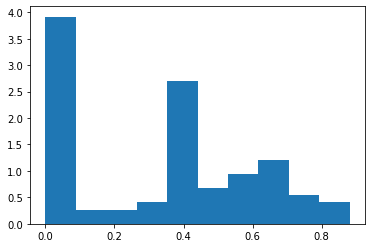

In [133]:
plt.hist(polarities, histtype='bar', density=True)